In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import textblob
import wordcloud

plt.style.use('ggplot')

In [2]:
path = '../Dataset/Sentiment_Stock_data.csv'

df = pd.read_csv(path)

df.head()

,Unnamed: 0,Sentiment,Sentence
0,0,0,"According to Gran , the company has no plans t..."
1,1,1,"For the last quarter of 2010 , Componenta 's n..."
2,2,1,"In the third quarter of 2010 , net sales incre..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,1,"For the last quarter of 2010 , Componenta 's n..."
2,1,"In the third quarter of 2010 , net sales incre..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


# Analysing the data

Getting word count of reviews

In [4]:
df['word_length'] = np.nan

In [5]:
df.head()

,Sentiment,Sentence,word_length
0,0,"According to Gran , the company has no plans t...",NaN
1,1,"For the last quarter of 2010 , Componenta 's n...",NaN
2,1,"In the third quarter of 2010 , net sales incre...",NaN
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,NaN
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",NaN


In [6]:
df.dtypes

Sentiment        int64
Sentence        object
word_length    float64
dtype: object

In [7]:
df.Sentence = df.Sentence.astype(dtype='str')

In [8]:
df.Sentence.apply(lambda x: len(x.split()))

0         24
1         38
2         28
3         23
4         21
          ..
108746    34
108747     8
108748    42
108749    47
108750    55
Name: Sentence, Length: 108751, dtype: int64

In [9]:
df.word_length = df.Sentence.apply(lambda x: len(x.split()))

df.head()

,Sentiment,Sentence,word_length
0,0,"According to Gran , the company has no plans t...",24
1,1,"For the last quarter of 2010 , Componenta 's n...",38
2,1,"In the third quarter of 2010 , net sales incre...",28
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21


In [10]:
df['char_count'] = df.Sentence.apply(lambda x: len(x))

df.head()

,Sentiment,Sentence,word_length,char_count
0,0,"According to Gran , the company has no plans t...",24,126
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192
2,1,"In the third quarter of 2010 , net sales incre...",28,124
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102


In [11]:
df['average_words_length'] = df.char_count/df.word_length

In [12]:
df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length
0,0,"According to Gran , the company has no plans t...",24,126,5.250000
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143


Removing stop-words

In [13]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = stopwords.words('english')

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
df['stop_word_count'] = df.Sentence.apply(lambda x: len([
    word for word in x.split() if word.lower() in stop_words   
]))

In [16]:
df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4


In [17]:
df['stop_word_proportion'] = df.stop_word_count/df.word_length

df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count,stop_word_proportion
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12,0.500000
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16,0.421053
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8,0.285714
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6,0.260870
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4,0.190476


# Data Cleaning

In [18]:
df.Sentence.head()

0    According to Gran , the company has no plans t...
1    For the last quarter of 2010 , Componenta 's n...
2    In the third quarter of 2010 , net sales incre...
3    Operating profit rose to EUR 13.1 mn from EUR ...
4    Operating profit totalled EUR 21.1 mn , up fro...
Name: Sentence, dtype: object

Turning sentence into lowercase

In [19]:
df['lowercase_sentence'] = df.Sentence.apply(lambda x: x.lower())

In [20]:
df.lowercase_sentence[77]

'21 october 2010 - finnish fishing tackle company rapala vmc corp ( hel : rap1v ) said today its net profit rose to eur18 .9 m for the first nine months of 2010 from eur15 .1 m for the same period a year earlier '

Lowercase punctuation removal

In [21]:
df["lowercase_punctuation_removed"] = df['lowercase_sentence'].str.replace('[^\w\s]','', regex=True)

In [22]:
df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count,stop_word_proportion,lowercase_sentence,lowercase_punctuation_removed
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12,0.500000,"according to gran , the company has no plans t...",according to gran the company has no plans to...
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16,0.421053,"for the last quarter of 2010 , componenta 's n...",for the last quarter of 2010 componenta s net...
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8,0.285714,"in the third quarter of 2010 , net sales incre...",in the third quarter of 2010 net sales increa...
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6,0.260870,operating profit rose to eur 13.1 mn from eur ...,operating profit rose to eur 131 mn from eur 8...
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4,0.190476,"operating profit totalled eur 21.1 mn , up fro...",operating profit totalled eur 211 mn up from ...


Removal of stopwords

In [23]:
df['lowercase_punc_stopwords_removed'] = df.lowercase_punctuation_removed.apply(lambda x:
    " ".join(word for word in x.split() if word not in stop_words)
)

In [24]:
df.lowercase_punc_stopwords_removed.head()

0    according gran company plans move production r...
1    last quarter 2010 componenta net sales doubled...
2    third quarter 2010 net sales increased 52 eur ...
3    operating profit rose eur 131 mn eur 87 mn cor...
4    operating profit totalled eur 211 mn eur 186 m...
Name: lowercase_punc_stopwords_removed, dtype: object

In [25]:
pd.Series(" ".join(df['lowercase_punc_stopwords_removed']).split()).value_counts()[:50]

us            5021
new           3986
says          3244
world         2367
police        2186
government    2138
people        2043
said          1980
first         1954
years         1857
china         1838
war           1828
one           1789
eur           1784
israel        1709
1             1676
company       1624
million       1585
uk            1545
year          1540
russia        1537
president     1473
killed        1458
may           1429
two           1413
review        1386
north         1292
news          1288
man           1281
state         1250
court         1232
could         1220
2             1213
report        1205
group         1204
russian       1178
back          1171
time          1170
leader        1168
minister      1165
iran          1144
israeli       1140
death         1138
un            1135
korea         1131
united        1117
military      1115
attack        1108
country       1086
bank          1085
Name: count, dtype: int64

Adding a few extra stopwords based on intuition

In [26]:
more_stop_words = ['says', 'said', 'man', 'one', 'two', 'n', 'u']

In [27]:
df['clean_sentences'] = df.lowercase_punc_stopwords_removed.apply(
    lambda x:
        " ".join(word for word in x.split() if word not in more_stop_words)
)

In [28]:
df.clean_sentences.head()

0    according gran company plans move production r...
1    last quarter 2010 componenta net sales doubled...
2    third quarter 2010 net sales increased 52 eur ...
3    operating profit rose eur 131 mn eur 87 mn cor...
4    operating profit totalled eur 211 mn eur 186 m...
Name: clean_sentences, dtype: object

# Lemmatization

Using TextBlob to lemmatize words

In [29]:
from textblob import Word 

In [30]:
df['final_lemmatized'] = df.clean_sentences.apply(
    lambda x:
        " ".join(Word(wrd).lemmatize() for wrd in x.split())
)

In [31]:
df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count,stop_word_proportion,lowercase_sentence,lowercase_punctuation_removed,lowercase_punc_stopwords_removed,clean_sentences,final_lemmatized
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12,0.500000,"according to gran , the company has no plans t...",according to gran the company has no plans to...,according gran company plans move production r...,according gran company plans move production r...,according gran company plan move production ru...
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16,0.421053,"for the last quarter of 2010 , componenta 's n...",for the last quarter of 2010 componenta s net...,last quarter 2010 componenta net sales doubled...,last quarter 2010 componenta net sales doubled...,last quarter 2010 componenta net sale doubled ...
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8,0.285714,"in the third quarter of 2010 , net sales incre...",in the third quarter of 2010 net sales increa...,third quarter 2010 net sales increased 52 eur ...,third quarter 2010 net sales increased 52 eur ...,third quarter 2010 net sale increased 52 eur 2...
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6,0.260870,operating profit rose to eur 13.1 mn from eur ...,operating profit rose to eur 131 mn from eur 8...,operating profit rose eur 131 mn eur 87 mn cor...,operating profit rose eur 131 mn eur 87 mn cor...,operating profit rose eur 131 mn eur 87 mn cor...
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4,0.190476,"operating profit totalled eur 21.1 mn , up fro...",operating profit totalled eur 211 mn up from ...,operating profit totalled eur 211 mn eur 186 m...,operating profit totalled eur 211 mn eur 186 m...,operating profit totalled eur 211 mn eur 186 m...


# Making WordClouds

In [32]:
text_data = " ".join(
    temp
    for temp in df.final_lemmatized
)

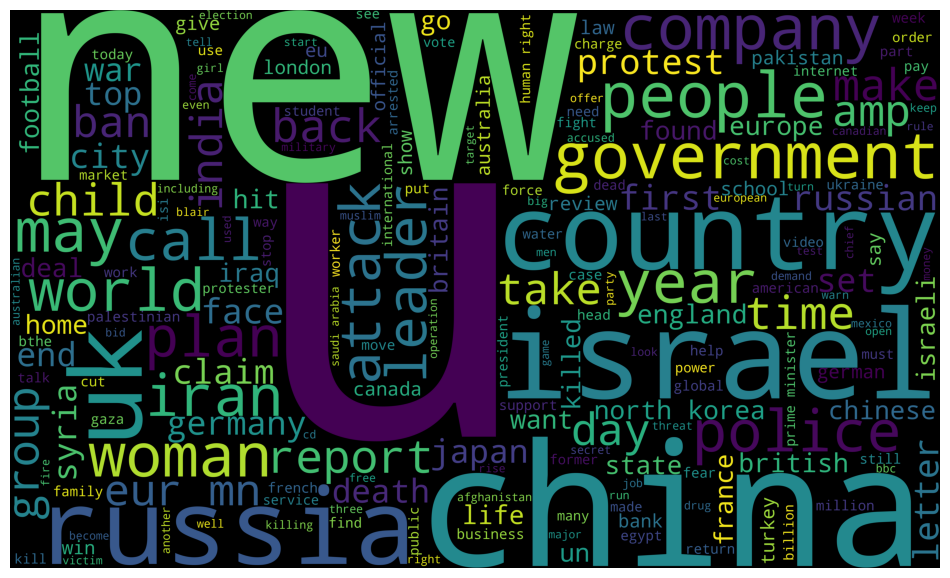

In [33]:
wrdcld = wordcloud.WordCloud (
    width=5000,
    height=3000
).generate(text_data)

# plotting after changing dimensions 
plt.figure(1, figsize=(12, 12))


plt.imshow(wrdcld)
plt.axis("off")
plt.show()

# plt.savefig('../Images/WordCloud.png')

### Negative Sentiment WordCloud

In [34]:
temp_df_neg = df[
    df.Sentiment == 0
]

temp_df_neg.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count,stop_word_proportion,lowercase_sentence,lowercase_punctuation_removed,lowercase_punc_stopwords_removed,clean_sentences,final_lemmatized
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12,0.500000,"according to gran , the company has no plans t...",according to gran the company has no plans to...,according gran company plans move production r...,according gran company plans move production r...,according gran company plan move production ru...
36,0,At the request of Finnish media company Alma M...,49,289,5.897959,17,0.346939,at the request of finnish media company alma m...,at the request of finnish media company alma m...,request finnish media company alma media newsp...,request finnish media company alma media newsp...,request finnish medium company alma medium new...
37,0,STOCK EXCHANGE ANNOUNCEMENT 20 July 2006 1 ( 1...,33,197,5.969697,8,0.242424,stock exchange announcement 20 july 2006 1 ( 1...,stock exchange announcement 20 july 2006 1 1 ...,stock exchange announcement 20 july 2006 1 1 b...,stock exchange announcement 20 july 2006 1 1 b...,stock exchange announcement 20 july 2006 1 1 b...
38,0,"A maximum of 666,104 new shares can further be...",21,119,5.666667,9,0.428571,"a maximum of 666,104 new shares can further be...",a maximum of 666104 new shares can further be ...,maximum 666104 new shares subscribed exercisin...,maximum 666104 new shares subscribed exercisin...,maximum 666104 new share subscribed exercising...
39,0,Tiimari operates 194 stores in six countries -...,24,134,5.583333,6,0.250000,tiimari operates 194 stores in six countries -...,tiimari operates 194 stores in six countries ...,tiimari operates 194 stores six countries incl...,tiimari operates 194 stores six countries incl...,tiimari operates 194 store six country includi...


In [35]:
text_data_negative = " ".join(
    temp
    for temp in temp_df_neg.final_lemmatized
)

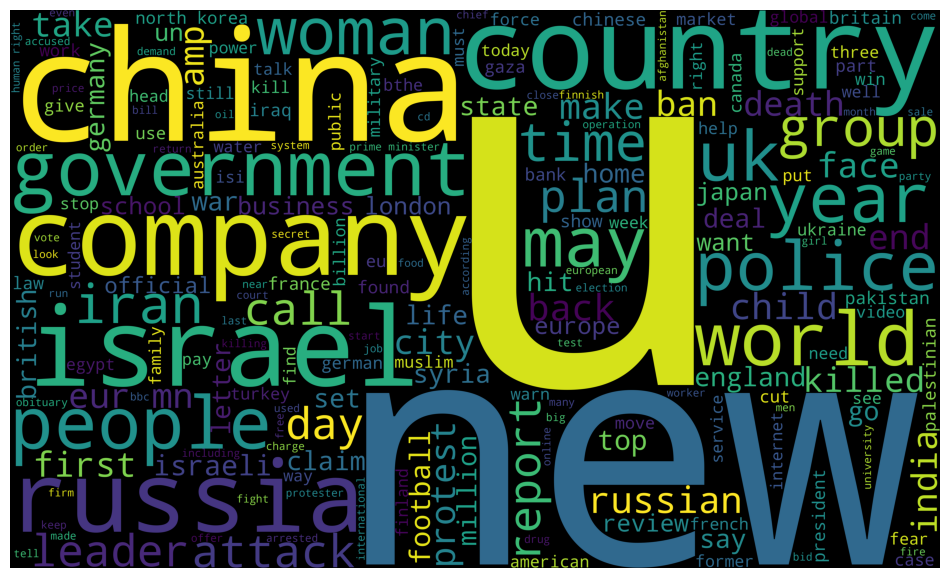

In [36]:
wrdcld2 = wordcloud.WordCloud (
    width=5000,
    height=3000
).generate(text_data_negative)

# plotting after changing dimensions 
plt.figure(1, figsize=(12, 12))


plt.imshow(wrdcld2)
plt.axis("off")

plt.show()

# plt.savefig('../Images/WordCloud_negative.png')

### Positive Sentiment WordCloud

In [37]:
temp_df_pos = df[
    df.Sentiment == 1
]

temp_df_pos.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count,stop_word_proportion,lowercase_sentence,lowercase_punctuation_removed,lowercase_punc_stopwords_removed,clean_sentences,final_lemmatized
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16,0.421053,"for the last quarter of 2010 , componenta 's n...",for the last quarter of 2010 componenta s net...,last quarter 2010 componenta net sales doubled...,last quarter 2010 componenta net sales doubled...,last quarter 2010 componenta net sale doubled ...
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8,0.285714,"in the third quarter of 2010 , net sales incre...",in the third quarter of 2010 net sales increa...,third quarter 2010 net sales increased 52 eur ...,third quarter 2010 net sales increased 52 eur ...,third quarter 2010 net sale increased 52 eur 2...
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6,0.260870,operating profit rose to eur 13.1 mn from eur ...,operating profit rose to eur 131 mn from eur 8...,operating profit rose eur 131 mn eur 87 mn cor...,operating profit rose eur 131 mn eur 87 mn cor...,operating profit rose eur 131 mn eur 87 mn cor...
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4,0.190476,"operating profit totalled eur 21.1 mn , up fro...",operating profit totalled eur 211 mn up from ...,operating profit totalled eur 211 mn eur 186 m...,operating profit totalled eur 211 mn eur 186 m...,operating profit totalled eur 211 mn eur 186 m...
5,1,Finnish Talentum reports its operating profit ...,33,162,4.909091,8,0.242424,finnish talentum reports its operating profit ...,finnish talentum reports its operating profit ...,finnish talentum reports operating profit incr...,finnish talentum reports operating profit incr...,finnish talentum report operating profit incre...


In [38]:
text_data_positive = " ".join(
    temp
    for temp in temp_df_pos.final_lemmatized
)

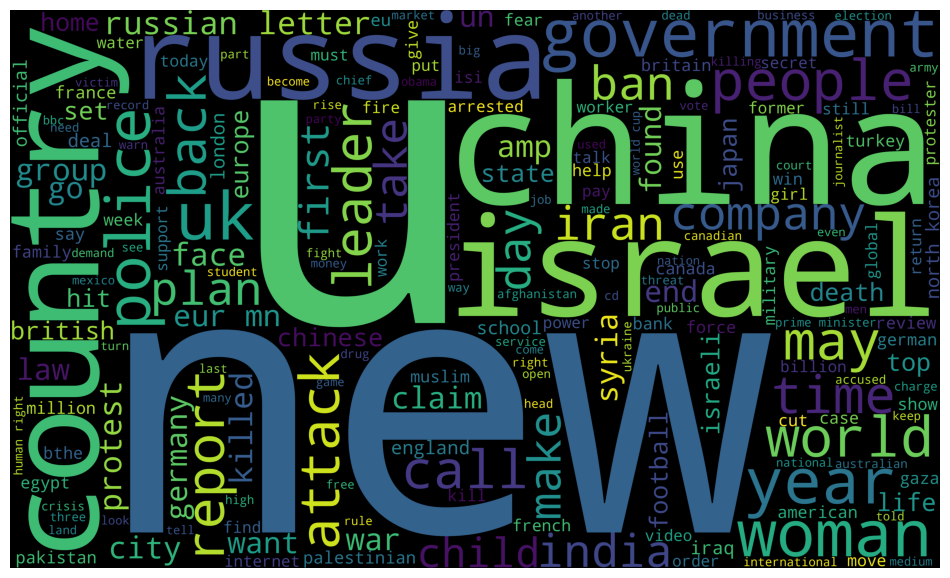

In [39]:
wrdcld3 = wordcloud.WordCloud (
    width=5000,
    height=3000
).generate(text_data_positive)

# plotting after changing dimensions 
plt.figure(1, figsize=(12, 12))


plt.imshow(wrdcld3)
plt.axis("off")

plt.show()

# plt.savefig('../Images/WordCloud_positive.png')

# Sentiment Analysis

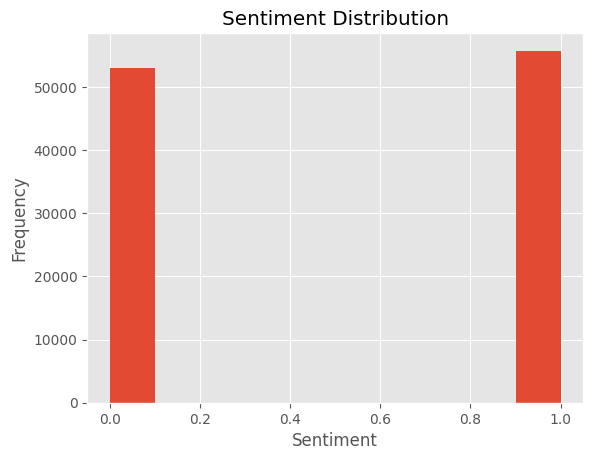

In [40]:
df.Sentiment.plot(kind='hist', xlabel='Sentiment', title='Sentiment Distribution')

plt.savefig('../Images/Sentiment_distribution.png')

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

Sent_encoded = lb.fit_transform(df.Sentiment)

In [43]:
df.Sentiment

0         0
1         1
2         1
3         1
4         1
         ..
108746    1
108747    1
108748    1
108749    1
108750    1
Name: Sentiment, Length: 108751, dtype: int64

In [44]:
x = df.final_lemmatized

y = Sent_encoded

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=df.Sentiment)

### Vectorization

Three options for vectorization include 
- Bag of words (sklearn.feature_extraction.text.CountVectorizer)
    - Treats each word as an independent token, ignoring word order and meaning. Each document is represented as a histogram of word frequencies.
- TF-IDF Vectorizer
    - Builds on BoW, but weights words based on their frequency in the document (TF) and rarity across the corpus (IDF). Emphasizes words that are important to a specific document and rare in the overall corpus.
- Word2Vec
    - Uses word embedding techniques to model words as vectors in a continuous space. These vectors capture semantic relationships between words. A famous example would be (king - man + woman) = (queen)
    

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,3))

tfidf_vec.fit(x.tolist())

x_train_tfidf = tfidf_vec.transform(x_train)
x_test_tfidf = tfidf_vec.transform(x_test)

In [48]:
y_train.shape

(81563, 1)

In [49]:
y_train = y_train.reshape((81563, ))

y_train

array([1, 1, 1, ..., 0, 0, 0])

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr_model = LogisticRegression(class_weight = 'balanced')
lr_model.fit(x_train_tfidf, y_train)

LogisticRegression(class_weight='balanced')

In [52]:
pred_lr = lr_model.predict(x_test_tfidf)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test, pred_lr)

0.5317419449757246

In [55]:
#building confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_lr)
cm

array([[6392, 6865],
       [5866, 8065]])

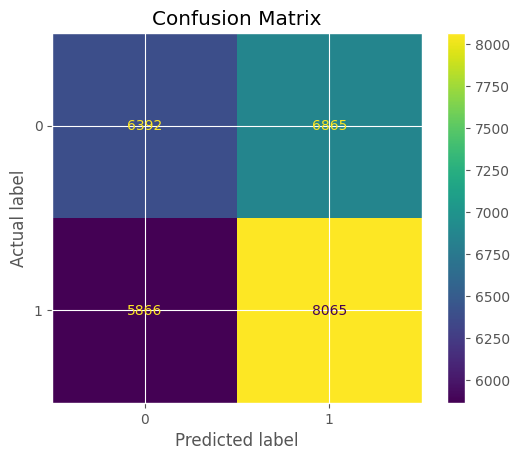

In [56]:
disp = ConfusionMatrixDisplay ( confusion_matrix = cm, \
                                display_labels = lr_model.classes_)

disp.plot()

plt.ylabel('Actual label')
plt.title('Confusion Matrix')

plt.show()

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50     13257
           1       0.54      0.58      0.56     13931

    accuracy                           0.53     27188
   macro avg       0.53      0.53      0.53     27188
weighted avg       0.53      0.53      0.53     27188



# Naive-Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
nb_model = MultinomialNB()

nb_model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [60]:
pred_nb = nb_model.predict(x_test_tfidf)

In [61]:
accuracy_score(y_test, pred_nb)

0.5442474621156392

In [62]:
cm_2 = confusion_matrix(y_test, pred_nb)

cm_2

array([[ 4514,  8743],
       [ 3648, 10283]])

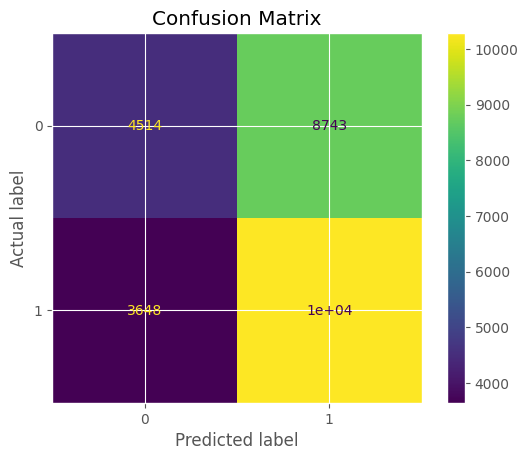

In [63]:
disp = ConfusionMatrixDisplay ( confusion_matrix = cm_2, \
                                display_labels = nb_model.classes_)

disp.plot()

plt.ylabel('Actual label')
plt.title('Confusion Matrix')

plt.show()

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.55      0.34      0.42     13257
           1       0.54      0.74      0.62     13931

    accuracy                           0.54     27188
   macro avg       0.55      0.54      0.52     27188
weighted avg       0.55      0.54      0.53     27188



# SVM

In [65]:
from sklearn.svm import SVC

In [66]:
svc_model = SVC(kernel='linear', random_state = 10)

svc_model.fit(x_train_tfidf, y_train)

SVC(kernel='linear', random_state=10)

In [67]:
pred_svc = svc_model.predict(x_test_tfidf)

In [68]:
accuracy_score(y_test, pred_svc)

0.536707370898926

In [69]:
#building confusion matrix

cm_3 = confusion_matrix(y_test, pred_svc)
cm_3

array([[5802, 7455],
       [5141, 8790]])

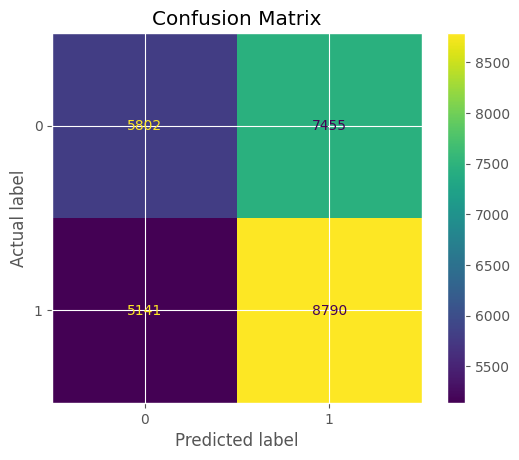

In [70]:
disp = ConfusionMatrixDisplay ( confusion_matrix = cm_3, \
                                display_labels = svc_model.classes_)

disp.plot()

plt.ylabel('Actual label')
plt.title('Confusion Matrix')

plt.show()

In [71]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.53      0.44      0.48     13257
           1       0.54      0.63      0.58     13931

    accuracy                           0.54     27188
   macro avg       0.54      0.53      0.53     27188
weighted avg       0.54      0.54      0.53     27188



# Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc_model = RandomForestClassifier()

rfc_model.fit(x_train_tfidf, y_train)

RandomForestClassifier()

In [74]:
pred_rfc = rfc_model.predict(x_test_tfidf)

In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_rfc)

0.5386567603354421

In [77]:
#building confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm_4 = confusion_matrix(y_test, pred_rfc)
cm_4

array([[ 4360,  8897],
       [ 3646, 10285]])

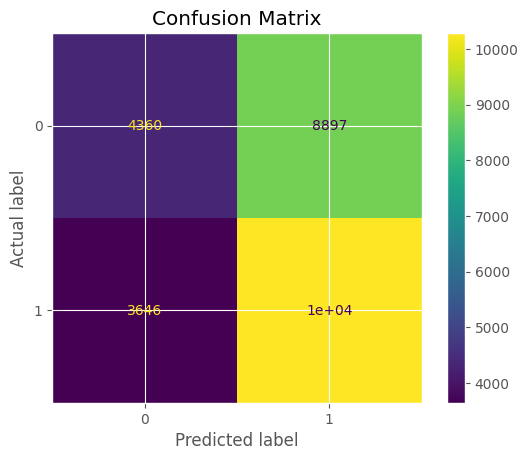

In [78]:
disp = ConfusionMatrixDisplay ( 
        confusion_matrix = cm_4, \
        display_labels = rfc_model.classes_
    )

disp.plot()

plt.ylabel('Actual label')
plt.title('Confusion Matrix')

plt.show()

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.54      0.33      0.41     13257
           1       0.54      0.74      0.62     13931

    accuracy                           0.54     27188
   macro avg       0.54      0.53      0.52     27188
weighted avg       0.54      0.54      0.52     27188



# Conclusion:

Ranking models based on accuracy:

- Naive-Bayes: 54.42%
- SVM: 53.67%
- Random Forest Classifier: 53.86%
- Logistic Regression: 53.17%

# Thankyou!!